# Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
import gzip

# Loading the Datafiles into Dataframes

## Loading the Meta Data

In [3]:
app=[]
with gzip.open('meta_Luxury_Beauty.json.gz') as file:
    for i in file:
        app.append(json.loads(i.strip()))

In [4]:
df_meta=pd.DataFrame.from_dict(app)
df_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [6]:
df_meta.shape

(12299, 19)

In [5]:
df_meta['brand'].value_counts()

                          12287
UNITE Hair                    4
PUR                           3
PHYTO                         1
bliss                         1
ZWILLING J.A. Henckels        1
Kneipp                        1
H2O+ Beauty                   1
Name: brand, dtype: int64

## Loading the Rating(Reviews) Data

In [4]:
df_rating=pd.read_csv('Luxury_Beauty.csv',header=None)
df_rating.head()

,0,1,2,3
0,B00004U9V2,A1Q6MUU0B2ZDQG,2.0,1276560000
1,B00004U9V2,A3HO2SQDCZIE9S,5.0,1262822400
2,B00004U9V2,A2EM03F99X3RJZ,5.0,1524009600
3,B00004U9V2,A3Z74TDRGD0HU,5.0,1524009600
4,B00004U9V2,A2UXFNW9RTL4VM,5.0,1523923200


In [5]:
import datetime  
# given epoch time  
epoch_time = 1471132800 
# using the datetime.fromtimestamp() function  
date_time = datetime.datetime.fromtimestamp( epoch_time )  
# printing the value  
print("Given epoch time:", epoch_time)  
print("Converted Datetime:", date_time )

Given epoch time: 1471132800
Converted Datetime: 2016-08-14 05:30:00


By using this function we got that the last coloumn of our ratingdataset is of dat_time

### Now we are setting the coloumn headers of our dataset

In [6]:
df_rating.columns=['product_id', 'reviewer_id', 'rating', 'date_time']
df_rating.head(3)

,product_id,reviewer_id,rating,date_time
0,B00004U9V2,A1Q6MUU0B2ZDQG,2.0,1276560000
1,B00004U9V2,A3HO2SQDCZIE9S,5.0,1262822400
2,B00004U9V2,A2EM03F99X3RJZ,5.0,1524009600


In [7]:
df_rating['reviewer_id'].nunique()

416174

In [8]:
df_rating['product_id'].nunique()

12120

In [9]:
df_rating['rating'].value_counts()

5.0    382152
4.0     70481
1.0     50501
3.0     41988
2.0     29506
Name: rating, dtype: int64

## Loading the Core Data

In [10]:
app_1=[]
with gzip.open('Luxury_Beauty_5.json.gz') as file:
    for i in file:
        app_1.append(json.loads(i.strip()))

In [11]:
df_core=pd.DataFrame.from_dict(app_1)
df_core.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [12]:
df_core['overall'].value_counts()

5.0    19970
4.0     7833
3.0     3884
2.0     1496
1.0     1095
Name: overall, dtype: int64

In [13]:
df_core['asin'].nunique()

1581

In [14]:
df_core['reviewerID'].nunique()

3819

# Data Exploration and Preprocessing

## Checking the shape of data

In [15]:
print("Shape of our Luxury_MetaData is:",df_meta.shape)
print("Shape of our Luxury_RatingData is:",df_rating.shape)
print("Shape of our Luxury_CoreDatais:",df_core.shape)

Shape of our Luxury_MetaData is: (12299, 19)
Shape of our Luxury_RatingData is: (574628, 4)
Shape of our Luxury_CoreDatais: (34278, 12)


## Cleaning of Datasets

### We are making a new coloumn as 'rank_no' after removing the unwanted data from rank coloumn and converting it into 'int' datatype

In [16]:
df_meta['rank_no'] = df_meta['rank'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df_meta['rank_no']

0           4324.0
1        1633549.0
2        1806710.0
3              NaN
4          42464.0
           ...    
12294      88740.0
12295     122331.0
12296     168028.0
12297     490755.0
12298     181383.0
Name: rank_no, Length: 12299, dtype: float64

## Creating Some functions for the Modular Coding

In [17]:
def null_values(df):
    print(f"Total null values with repect too each column are:- {df.isnull().sum()}")

In [18]:
def per_null(df,col):
    null=df[col].isnull().sum()
    total=len(df)
    percent=(null/total)*100
    print(f"Percentage of null values are {round(percent,2)}")

In [19]:
def val_count(df,col):
    print(f"Counts of each category are {df[col].value_counts()}")

In [20]:
def n_unq(df,col):
    print(f"No. of unique values are {df[col].nunique()}")

# Data Merging

## We are merging the CoreData with RatingData by inner on reviewer id and product id

In [21]:
df_merge_core=pd.merge(df_core,df_rating,left_on=['reviewerID','asin'],right_on=['reviewer_id','product_id'],how='inner')
df_merge_core.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,product_id,reviewer_id,rating,date_time
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,B00004U9V2,A2HOI48JK8838M,5.0,1515110400
1,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,B00004U9V2,A2HOI48JK8838M,3.0,1471132800
2,3.0,True,"08 14, 2016",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 3.5 oz.'},DB,There is no evidence to me that this product i...,Paying for the name,1471132800,NaN,NaN,B00004U9V2,A2HOI48JK8838M,5.0,1515110400


In [22]:
print("Shape of the merged core and rating dataset is:",df_merge_core.shape)

Shape of the merged core and rating dataset is: (199418, 16)


## Now, we are merging the MetaData with the Merged(Core & Rating) Data by inner on product id

In [23]:
df_final=pd.merge(df_merge_core,df_meta,left_on='product_id',right_on='asin',how='inner')
df_final.head()

,overall,verified,reviewTime,reviewerID,asin_x,style,reviewerName,reviewText,summary,unixReviewTime,...,also_view,details,main_cat,similar_item,date,price,asin_y,imageURL,imageURLHighRes,rank_no
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,...,"[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,4324.0
1,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,...,"[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,4324.0
2,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,...,"[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,4324.0
3,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,...,"[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,4324.0
4,3.0,True,"08 14, 2016",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 3.5 oz.'},DB,There is no evidence to me that this product i...,Paying for the name,1471132800,...,"[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,4324.0


In [24]:
print("Shape of the final merged LuxuryBeauty Dataset is:",df_final.shape)

Shape of the final merged LuxuryBeauty Dataset is: (201638, 36)


# Feature Selection From the Dataset

In [25]:
df_final_eda=df_final[['reviewTime','reviewerID','product_id','reviewText','summary','rating','main_cat','title','rank_no','price','reviewerName','verified']].drop_duplicates()
df_final_eda.shape

(31341, 12)

In [26]:
# drop rows which have same reviewerID,product_id
# and reviewtime and keep latest entry
df_final_eda_1= df_final_eda.drop_duplicates(subset = ['reviewerID', 'product_id','reviewTime'],keep = 'last').reset_index(drop = True)


In [27]:
df_final_eda_1.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified
0,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True
1,"08 14, 2016",A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True
2,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,Ajaey,True
3,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True
4,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True


In [28]:
df_final_eda_d=df_final_eda_1.copy()
df_final_eda_d.to_csv('timeseries.csv',index=False)

## Checking for null values

In [29]:
null_values(df_final_eda_1)

Total null values with repect too each column are:- reviewTime       0
reviewerID       0
product_id       0
reviewText      10
summary         15
rating           0
main_cat         0
title            0
rank_no         26
price            0
reviewerName     0
verified         0
dtype: int64


## As we can see there are some null values so we are dropping them

In [30]:
df_final_eda_1.dropna(inplace=True)

In [31]:
null_values(df_final_eda_1)

Total null values with repect too each column are:- reviewTime      0
reviewerID      0
product_id      0
reviewText      0
summary         0
rating          0
main_cat        0
title           0
rank_no         0
price           0
reviewerName    0
verified        0
dtype: int64


## Information of our dataset

In [32]:
df_final_eda_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28976 entries, 0 to 29026
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewTime    28976 non-null  object 
 1   reviewerID    28976 non-null  object 
 2   product_id    28976 non-null  object 
 3   reviewText    28976 non-null  object 
 4   summary       28976 non-null  object 
 5   rating        28976 non-null  float64
 6   main_cat      28976 non-null  object 
 7   title         28976 non-null  object 
 8   rank_no       28976 non-null  float64
 9   price         28976 non-null  object 
 10  reviewerName  28976 non-null  object 
 11  verified      28976 non-null  bool   
dtypes: bool(1), float64(2), object(9)
memory usage: 2.7+ MB


## Converting the datatype of 'reviewTime' from object to date

In [33]:
 df_final_eda_1['reviewTime'] = pd.to_datetime(df_final_eda_1['reviewTime']).dt.date

In [34]:
df_final_eda_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28976 entries, 0 to 29026
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewTime    28976 non-null  object 
 1   reviewerID    28976 non-null  object 
 2   product_id    28976 non-null  object 
 3   reviewText    28976 non-null  object 
 4   summary       28976 non-null  object 
 5   rating        28976 non-null  float64
 6   main_cat      28976 non-null  object 
 7   title         28976 non-null  object 
 8   rank_no       28976 non-null  float64
 9   price         28976 non-null  object 
 10  reviewerName  28976 non-null  object 
 11  verified      28976 non-null  bool   
dtypes: bool(1), float64(2), object(9)
memory usage: 2.7+ MB


In [35]:
df_final_eda_1.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified
0,2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True
1,2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True
2,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,Ajaey,True
3,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True
4,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True


In [36]:
def date_time(epoch_time):
    date_time = datetime.datetime.fromtimestamp( epoch_time )
    return date_time

## Creating Year and Month Coloumn 

In [37]:
df_final_eda_1['year']=df_final_eda_1['reviewTime'].apply(lambda x:x.year)

In [38]:
df_final_eda_1['month']=df_final_eda_1['reviewTime'].apply(lambda x:x.month)

In [39]:
df_final_eda_1.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month
0,2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True,2018,1
1,2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,DB,True,2016,8
2,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,Ajaey,True,2017,4
3,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True,2017,3
4,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,$30.00,D. Jones,True,2017,2


## Removing the unwanted data from the Price coloumn

In [40]:
df_final_eda_1['price']=df_final_eda_1['price'].str.replace('$','')

In [41]:
df_final_eda_1['price']=df_final_eda_1['price'].str.replace(',','')

In [42]:
p=[]
for i in df_final_eda_1['price']:
    if len(i)<10:
        p.append(i)
    else:
        p.append('0')
p

['30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '30.00',
 '23.00',
 '23.00',
 '23.00',
 '23.00',
 '23.00',
 '23.00',
 '23.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '64.00',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.40',
 '8.4

In [43]:
df_final_eda_1['price']=p

In [44]:
df_final_eda_1['price'].replace('','0',inplace=True)

In [45]:
df_final_eda_1['price']=df_final_eda_1['price'].astype('float64')

In [46]:
df_final_eda_1[df_final_eda_1['price']==0]

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month
223,2018-04-11,AJ9VB45YRX8C9,B0001433OU,Love this color and brand,Five Stars,5.0,Luxury Beauty,"OPI Nail Lacquer, You&rsquo;ve Got Nata on Me,...",138996.0,0.0,Amazon Customer,True,2018,4
224,2018-03-08,A2L77YQRAEA1YZ,B0001433OU,"Beautiful color, easy formula, with 2 coats fo...",Pretty common blue,4.0,Luxury Beauty,"OPI Nail Lacquer, You&rsquo;ve Got Nata on Me,...",138996.0,0.0,ELLE,False,2018,3
225,2016-06-09,A11YA52GQ0D6B6,B0001433OU,GREAT color,Five Stars,5.0,Luxury Beauty,"OPI Nail Lacquer, You&rsquo;ve Got Nata on Me,...",138996.0,0.0,Caryl,True,2016,6
226,2012-03-06,A34EQAIKKUWYYW,B0001433OU,"After much deliberation and a lot of wine, I d...","Classy Gray, only a little weak",4.0,Luxury Beauty,"OPI Nail Lacquer, You&rsquo;ve Got Nata on Me,...",138996.0,0.0,K. Wright,True,2012,3
227,2018-04-25,A2WYTRZHKIDZ0K,B0001433OU,This is a bright red lacquer that I find long ...,Product arrived on time and in excellent condi...,5.0,Luxury Beauty,"OPI Nail Lacquer, You&rsquo;ve Got Nata on Me,...",138996.0,0.0,Arlene,True,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28997,2016-03-24,A1IA0O3OYQO9LV,B00SVEPTW6,"I was excited to order this, but my nickname f...",Eau de bug spray,1.0,Luxury Beauty,Raw Spirit Luxury Eau de Parfum (Citadelle Lux...,772129.0,0.0,Unity Dienes,False,2016,3
28998,2016-03-23,A2PL0US7RN67G,B00SVEPTW6,"I love this earthy, grounding and deeply sensu...",deeply sensual scent for man or woman,5.0,Luxury Beauty,Raw Spirit Luxury Eau de Parfum (Citadelle Lux...,772129.0,0.0,Jennifer,False,2016,3
28999,2016-03-22,A1EMN4T3ROJDOO,B00SVEPTW6,I was very excited to get this parfum. It sme...,Strong - don't over spray!,4.0,Luxury Beauty,Raw Spirit Luxury Eau de Parfum (Citadelle Lux...,772129.0,0.0,Karen E. Koch,False,2016,3
29000,2016-03-18,A39H1GO9E3YQIB,B00SVEPTW6,This Citadelle by Raw Spirit is a wonderful sc...,"Woodsy and exquisite, for me a powerful scent ...",5.0,Luxury Beauty,Raw Spirit Luxury Eau de Parfum (Citadelle Lux...,772129.0,0.0,a,False,2016,3


In [47]:
df_final_eda_1.loc[df_final_eda_1['price']==0,'price']=np.nan

In [48]:
per_null(df_final_eda_1,'price')

Percentage of null values are 26.59


In [49]:
df_final_eda_1['price'].fillna(df_final_eda_1.groupby('product_id')['price'].transform('mean'), inplace = True)

In [50]:
per_null(df_final_eda_1,'price')

Percentage of null values are 26.59


In [51]:
df_final_eda_1['price']=df_final_eda_1.groupby('product_id')['price'].apply(lambda x:x.fillna(x.mean()))

In [52]:
per_null(df_final_eda_1,'price')

Percentage of null values are 26.59


In [53]:
df_final_eda_1['price'] = df_final_eda_1.groupby("product_id").price.transform(lambda x: x.fillna(x.mean()))

In [54]:
per_null(df_final_eda_1,'price')

Percentage of null values are 26.59


In [55]:
df_final_eda_1.dropna(inplace=True)

In [56]:
null_values(df_final_eda_1)

Total null values with repect too each column are:- reviewTime      0
reviewerID      0
product_id      0
reviewText      0
summary         0
rating          0
main_cat        0
title           0
rank_no         0
price           0
reviewerName    0
verified        0
year            0
month           0
dtype: int64


## Converting the file to CSV format

In [57]:
df_final_eda_1.to_csv('luxury_beauty_final.csv',index=False)

# Exploratory Data Analysis(EDA)

## Creating functions for the Analysis of Categorical Columns

In [58]:
def info_of_cat(df,col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

In [59]:
def func_plot_cat(df,col):
    fig, ax = plt.subplots(1, 2, figsize = (20, 9))
    ax[0].set_title(col)                  
    percentage = df[col].value_counts()         
    labels = list(df[col].value_counts().index) 
    labels1=labels[-1:]
    sns.countplot(x = df[col], ax = ax[0],palette='Set2')
    ax[0].set_xticklabels( labels1, rotation=90 )
    ax[1].set_title(col) 
    plt.pie(percentage,labels = abc, autopct= "%0.2f%%",colors=["#20B2AA","#98FB98","#FFA07A","#F0E68C","#66CDAA","#DDA0DD","#FFB6C1","#F5F5DC","#D2B48C","#DCDCDC"]) 
    
    plt.show()

## Visualisation

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of rating

In [61]:
info_of_cat(df_final_eda_1,'rating')

Unique values in rating are: [3. 5. 4. 1. 2.]
Mode of rating is 5.0
Number of missing values in rating is 0


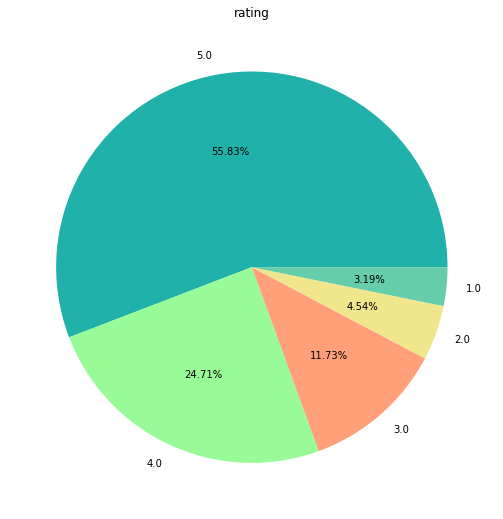

In [62]:
plt.figure(figsize = (20, 9))
percentage = df_final_eda_1['rating'].value_counts()         
labels = list(df_final_eda_1['rating'].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",colors=["#20B2AA","#98FB98","#FFA07A","#F0E68C","#66CDAA","#DDA0DD","#FFB6C1","#F5F5DC","#D2B48C","#DCDCDC"]) 
plt.title('rating')  
plt.show()


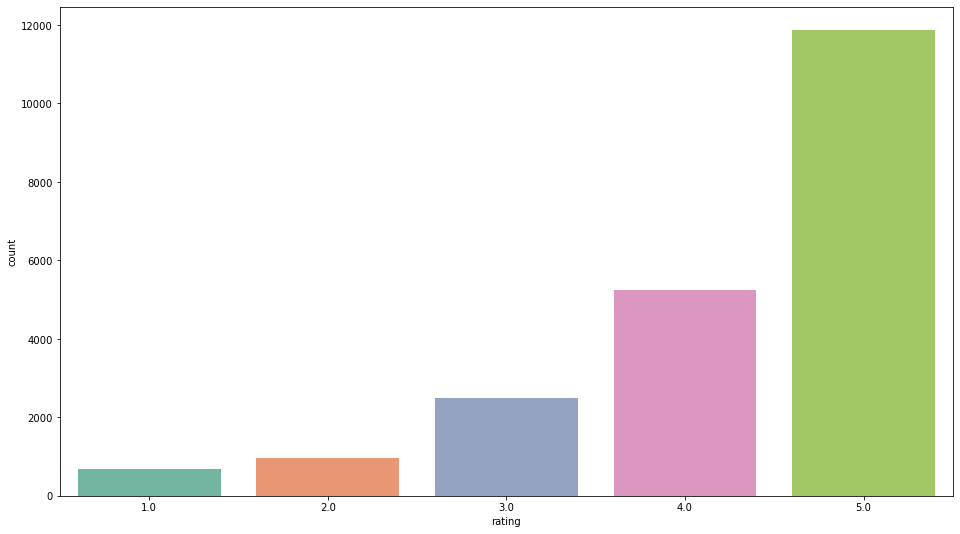

In [63]:
plt.figure(figsize=(16,9))
sns.countplot(x = df_final_eda_1['rating'],palette='Set2');

#### Observation :- About 12000 products have 5 rating and about 800 have 1 rating so we can arriive at a conclusion that majority of customers are satisfied with amazon products

## Analysis of product id

In [64]:
info_of_cat(df_final_eda_1,'product_id')

Unique values in product_id are: ['B00004U9V2' 'B00005V50B' 'B000068DWY' ... 'B01BI4R3NI' 'B01DSY5XZ6'
 'B01DSY86YG']
Mode of product_id is B003OGV7UO
Number of missing values in product_id is 0


In [65]:
def visual_cat_top(df,col):
    plt.figure(figsize = (20, 9))
    percentage = df[col].value_counts()[:10]         
    labels = list(df[col].value_counts()[:10].index)
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%",colors=["#20B2AA","#98FB98","#FFA07A","#F0E68C","#66CDAA","#DDA0DD","#FFB6C1","#F5F5DC","#D2B48C","#DCDCDC"]) 
    plt.title(col)
    plt.show()
    

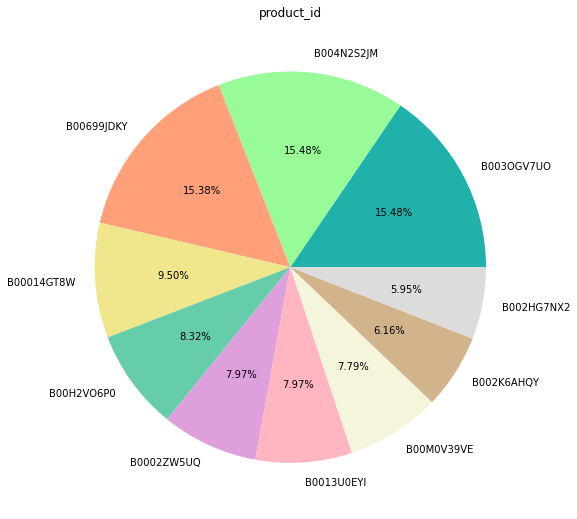

In [66]:
visual_cat_top(df_final_eda_1,'product_id')

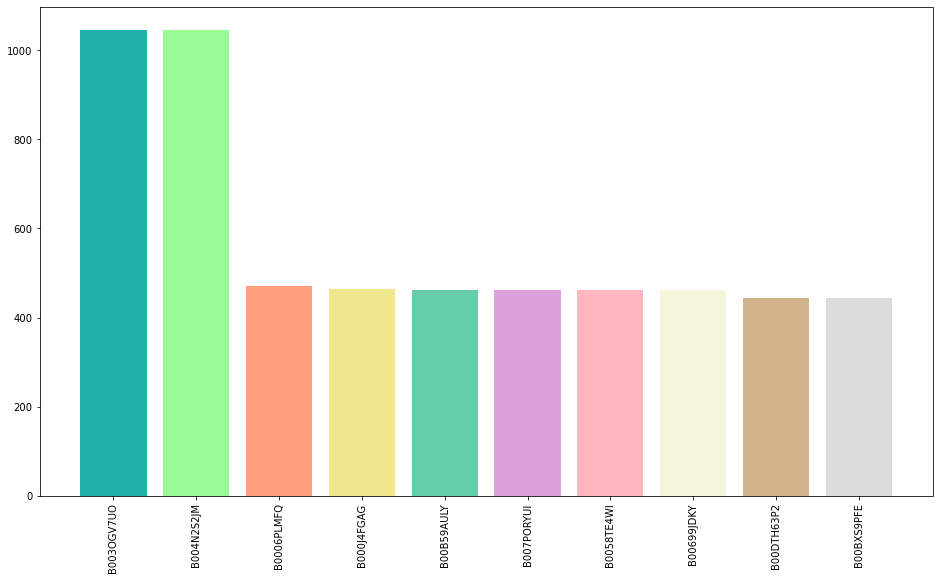

In [67]:
plt.figure(figsize=(16,9))
plt.bar(x=df_final_eda['product_id'].value_counts()[:10].index,height=df_final_eda['product_id'].value_counts()[:10],color=["#20B2AA","#98FB98","#FFA07A","#F0E68C","#66CDAA","#DDA0DD","#FFB6C1","#F5F5DC","#D2B48C","#DCDCDC"])
plt.xticks(rotation=90);

#### Observation:- These are the top 10 product ids according to contribution in data rows and product with product id -B004N2S2JM is sold maximum time about 1045

## Analysis of reviewer id

In [68]:
df_final_eda_1.head()

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month
0,2018-01-05,A2HOI48JK8838M,B00004U9V2,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2018,1
1,2016-08-14,A2HOI48JK8838M,B00004U9V2,There is no evidence to me that this product i...,Paying for the name,3.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,DB,True,2016,8
2,2017-04-05,A1YIPEY7HX73S7,B00004U9V2,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,Ajaey,True,2017,4
3,2017-03-27,A2QCGHIJ2TCLVP,B00004U9V2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,3
4,2017-02-28,A2QCGHIJ2TCLVP,B00004U9V2,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5.0,Luxury Beauty,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,30.0,D. Jones,True,2017,2


In [69]:
info_of_cat(df_final_eda_1,'reviewerID')

Unique values in reviewerID are: ['A2HOI48JK8838M' 'A1YIPEY7HX73S7' 'A2QCGHIJ2TCLVP' ... 'A1S7TXHM2VM5EF'
 'A20W9PSUAKDRN1' 'A3JBJWPDD07B40']
Mode of reviewerID is A2V5R832QCSOMX
Number of missing values in reviewerID is 0


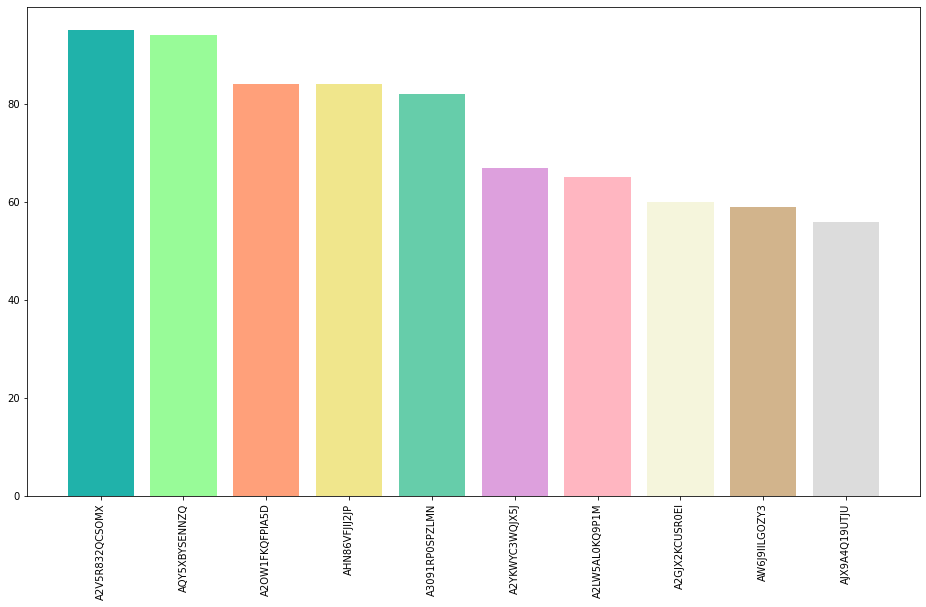

In [70]:
plt.figure(figsize=(16,9))
plt.bar(x=df_final_eda['reviewerID'].value_counts()[:10].index,height=df_final_eda['reviewerID'].value_counts()[:10],color=["#20B2AA","#98FB98","#FFA07A","#F0E68C","#66CDAA","#DDA0DD","#FFB6C1","#F5F5DC","#D2B48C","#DCDCDC"])
plt.xticks(rotation=90);

#### Observation:- These are the top reviewer id's who have given reviews more frequently

# Creating Function for the Analysis of numerical columns

In [71]:
def info_of_numerical(df,col):
    print(f"The mean  is {df[col].mean()}")
    print(f"The median is {df[col].median()}")
    print(f"The mode is {df[col].mode()[0]}")
    print(f"The standard deviation  is {df[col].std()}")
    print(f"Number of missing values  is {df[col].isnull().sum()}")

In [72]:
def func_plot_numeric(df,col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
    sns.histplot(x = df[col], ax =ax[1], palette= "Set2",kde=True)
    sns.boxplot(x = df[col], ax = ax[0], palette="Paired") 
    plt.show()

## Analysis of price

In [73]:
info_of_numerical(df_final_eda_1,'price')

The mean  is 39.85518992102322
The median is 29.0
The mode is 15.95
The standard deviation  is 41.750722534674175
Number of missing values  is 0


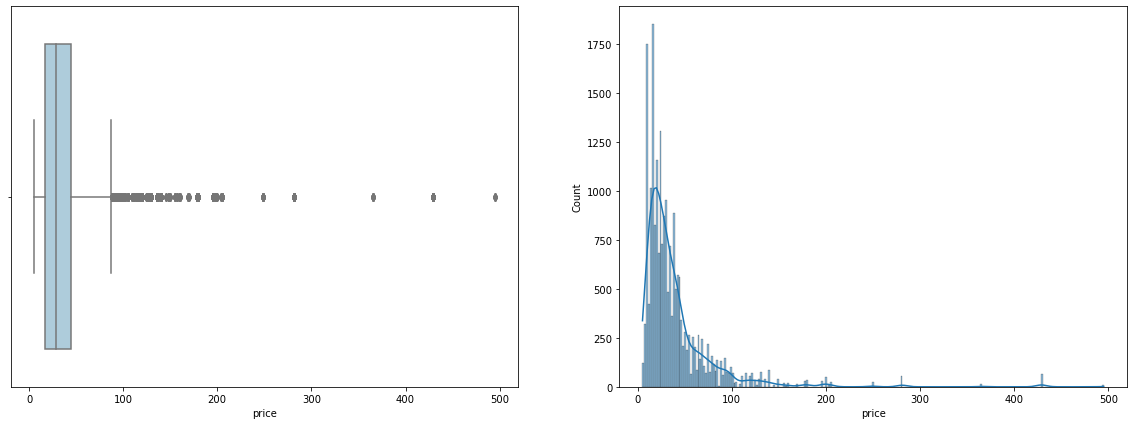

In [74]:
func_plot_numeric(df_final_eda_1,'price')

#### From this graph we can infer that outliers are there above the upper fence

## Outlier Treatment

In [75]:
df_final_eda_1['price'].describe()

count    21272.000000
mean        39.855190
std         41.750723
min          4.950000
25%         17.000000
50%         29.000000
75%         45.000000
max        495.000000
Name: price, dtype: float64

In [76]:
iqr=43.78-15.95 #Calculating the IQR

IQR=Q3-Q1

In [77]:
iqr

27.830000000000002

In [78]:
lower_fence=15.95-(1.5*iqr)
lower_fence

-25.795000000000005

lower_Fence=Q1-(1.5*IQR)

In [79]:
higher_fence=43.78+(1.5*iqr)
higher_fence

85.525

upper_fence=Q3+(1.5*IQR)

In [80]:
df_final_eda_1[df_final_eda_1['price']>higher_fence]

,reviewTime,reviewerID,product_id,reviewText,summary,rating,main_cat,title,rank_no,price,reviewerName,verified,year,month
1486,2010-08-14,A1YUL9PCJR3JTY,B0006NXBIE,"*****\nThis is a review for a ""handy"" or mediu...",Heirloom Brush to Last a Lifetime,5.0,Luxury Beauty,Mason Pearson Handy Mixture Bristle/nylon Mix ...,42683.0,150.0,O. Merce Brown,False,2010,8
1487,2010-08-11,A1YUL9PCJR3JTY,B0006NXBIE,"*****\nThis is a review for a ""handy"" or mediu...",Heirloom Brush of the Highest Quality,5.0,Luxury Beauty,Mason Pearson Handy Mixture Bristle/nylon Mix ...,42683.0,150.0,O. Merce Brown,False,2010,8
1488,2016-04-25,AVRV5NTGXZPAB,B0006NXBIE,I love this brush. I hesitated to buy it beca...,LOVE THIS BRUSH,5.0,Luxury Beauty,Mason Pearson Handy Mixture Bristle/nylon Mix ...,42683.0,150.0,Karen Sue,True,2016,4
1489,2014-09-21,A2WWHOH10OM5OJ,B0006NXBIE,Why would anyone spend this kid of money for a...,Because it is just that awesome. And it will l...,5.0,Luxury Beauty,Mason Pearson Handy Mixture Bristle/nylon Mix ...,42683.0,150.0,Chele Hipp,True,2014,9
1490,2013-11-14,AX4M4GN2DLA16,B0006NXBIE,I love my Mason Pearson! This is one of the be...,Mason Pearson is the best!,5.0,Luxury Beauty,Mason Pearson Handy Mixture Bristle/nylon Mix ...,42683.0,150.0,redrose,False,2013,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29022,2018-04-29,A1UQBFCERIP7VJ,B01DSY86YG,This white lotion has a light citrus fragrance...,High C moisturizer,5.0,Luxury Beauty,Dermatologic Cosmetic Laboratories C Scape Nig...,277840.0,120.0,Margaret P.,False,2018,4
29023,2018-04-22,AR9GZ8B7NJJPN,B01DSY86YG,"I am a long-time user of vitamin C products, c...",High C night cream,3.0,Luxury Beauty,Dermatologic Cosmetic Laboratories C Scape Nig...,277840.0,120.0,JoAnne Goldberg,False,2018,4
29024,2018-04-18,A2ZGPAIV64KOYU,B01DSY86YG,I'm surprised by the negative reviews for this...,This is working for me. Noticeable improvement...,5.0,Luxury Beauty,Dermatologic Cosmetic Laboratories C Scape Nig...,277840.0,120.0,Curious Epicure,False,2018,4
29025,2018-04-18,ACJ9N7ED37HXS,B01DSY86YG,"I am a fan of this company, and this product, ...","Nice feel the next morning, contains 30% Vitam...",4.0,Luxury Beauty,Dermatologic Cosmetic Laboratories C Scape Nig...,277840.0,120.0,kstars,False,2018,4


### For outliers np.clip maps the values above the higher fence to higher fence

In [81]:
arr_1=np.clip(np.array(df_final_eda_1['price']), lower_fence, higher_fence)

In [82]:
ser_1=pd.Series(arr_1)

In [83]:
ser_1.index=df_final_eda_1.index

In [84]:
df_final_eda_1['price']=ser_1

In [85]:
df_final_eda_1.loc[df_final_eda_1['price']>higher_fence]['price']

Series([], Name: price, dtype: float64)

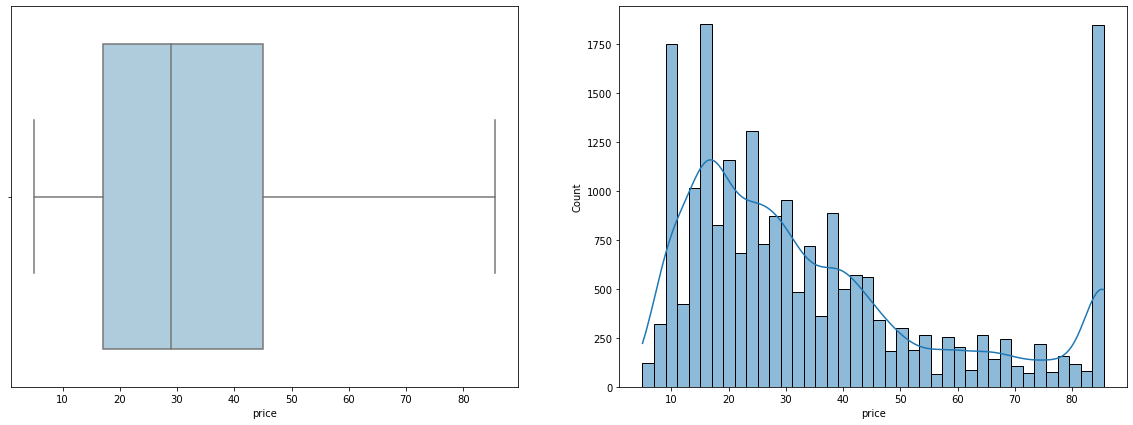

In [86]:
func_plot_numeric(df_final_eda_1,'price')

#### Now we can observe that the price column is following the right skewed distribution as q3-q2>q2-q1 with the price falling in between 15 and 45

## Converting this cleaned dataframe to CSV File for the Multivariate analysis on Tableau

In [87]:
df_final_eda_1.to_csv('finally_done.csv',index=False)

 $$ Moving-To-Tableau-For-the-further-Multivariate-Analysis $$